<a href="https://colab.research.google.com/github/nalymugwe/AML_Customer_Segmentation/blob/main/Tutorial_on_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prepare Environment

This section involves importing the libraries that will be required for coding and importing the data that will be needed for Feature Engineering.

In [1]:
# Import libraries
import kagglehub
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

In [2]:
# Download latest version of the dataset from Kaggle
path = kagglehub.dataset_download("njerijoan/lending-club")

# Print the filepath to the dataset
print("Path to dataset files:", path)

#Print the name of the file
print(os.listdir(path))

Path to dataset files: /root/.cache/kagglehub/datasets/njerijoan/lending-club/versions/1
['loan_data_2007_2014.csv']


In [3]:
# Load the CSV file
df = pd.read_csv(f"{path}/loan_data_2007_2014.csv")

# View the first 5 five rows of the data
pd.set_option('display.max_columns', None)
df.head()


<ipython-input-3-a3fae80acf23>:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"{path}/loan_data_2007_2014.csv")


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Understanding

This section is useful to understanding the type of dataset we have.

In [4]:
# Check the shape of the dataset
df.shape

(466285, 75)

In [5]:
# Review the summary description for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [6]:
# Check for missing values in each column
pd.set_option('display.max_rows', None)
df.isnull().sum()

,0
Unnamed: 0,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0


In [7]:
# Check for duplicates in the data
df.duplicated().sum()

0

### Data Preparation

This section helps clean the data to ensure we have quality data for feature engineering

#### Reasons for Missing Values

*   Missing Completely at Random (MCAR): No relationship between missingness and any other variable. Eg random system failure that would result in values not picked by the system.
*   Missing at Random (MAR): Related to other observed variables but not the missing value itself. Eg No income value present for minors.
*   Missing Not at Random (MNAR): Systematic missingness due to unobserved factors. Eg High debt customers not reporting their income.

#### Handling Missing Data

Drop Rows: If missing is less than 5% and random.

Drop Columns: If missing is  more than 50% and not crucial.

Impute Missing Values when columns are important to your data. If distribution is normal, use mean/median. Or ML tools for complex data.

In [8]:
# Drop columns with 100% missing values
df_cleaned = df.dropna(axis=1, how='all')

# Shape of the data post deleting columns
df_cleaned.shape

(466285, 58)

In [9]:
# Calculate the percentage of missing values of the remaining columns
missing_percentage = df_cleaned.isnull().sum() * 100 / len(df_cleaned)

# Print the percentage of missing values
missing_percentage

print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))


mths_since_last_record         86.566585
mths_since_last_major_derog    78.773926
desc                           72.981975
mths_since_last_delinq         53.690554
next_pymnt_d                   48.728567
total_rev_hi_lim               15.071469
tot_cur_bal                    15.071469
tot_coll_amt                   15.071469
emp_title                       5.916553
emp_length                      4.505399
last_pymnt_d                    0.080637
revol_util                      0.072917
collections_12_mths_ex_med      0.031097
last_credit_pull_d              0.009007
inq_last_6mths                  0.006219
open_acc                        0.006219
total_acc                       0.006219
earliest_cr_line                0.006219
delinq_2yrs                     0.006219
acc_now_delinq                  0.006219
pub_rec                         0.006219
title                           0.004504
annual_inc                      0.000858
dtype: float64


In [10]:
# Drop columns with more than 70% missing values (high missing values)
columns_to_drop = missing_percentage[missing_percentage > 70].index

# Drop the identified columns
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

# Print the shape of the DataFrame after removing the columns
df_cleaned.shape


(466285, 55)

In [11]:
# Use ML tools (KNN imputation) for numerical columns
# Uses patterns from nearby (similar) rows to predict and fill in the missing values.
# knn_imputer = KNNImputer(n_neighbors=5)

# knn_cols = ['revol_util', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
# df_cleaned[knn_cols] = knn_imputer.fit_transform(df_cleaned[knn_cols])

In [12]:
# Create missing indicators for columns with 30-70% missing values
missing_percent = df_cleaned.isnull().mean() * 100
columns_with_missing = missing_percent[(missing_percent >= 30) & (missing_percent <= 70)].index
for col in columns_with_missing:
    df_cleaned[f'{col}_missing'] = df_cleaned[col].isnull().astype(int)

print(f"Missing indicators created for: {columns_with_missing.tolist()}")

Missing indicators created for: ['mths_since_last_delinq', 'next_pymnt_d']


In [13]:
# Separate categorical and numerical columns
categorical_cols = df_cleaned.select_dtypes(include='object').columns
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Impute categorical columns with mode
for col in categorical_cols:
    if df_cleaned[col].isnull().sum() > 0:
        df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

# Impute numerical columns with median
for col in numerical_cols:
    if df_cleaned[col].isnull().sum() > 0:
        df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

print("Imputation completed for remaining missing values.")


<ipython-input-13-1a2a6eb5c133>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)


Imputation completed for remaining missing values.


<ipython-input-13-1a2a6eb5c133>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)


In [14]:
# Confirm missing values done
print(df_cleaned.isnull().sum().sort_values(ascending=False))

Unnamed: 0                        0
open_acc                          0
revol_bal                         0
revol_util                        0
total_acc                         0
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
last_pymnt_d                      0
last_pymnt_amnt                   0
next_pymnt_d                      0
last_credit_pull_d                0
collections_12_mths_ex_med        0
policy_code                       0
application_type                  0
acc_now_delinq                    0
tot_coll_amt                      0
tot_cur_bal                       0
total_rev_hi_lim                  0
mths_since_last_delinq_missing    0
pub_rec                     

In [15]:
# View the first five rows of the data
df_cleaned.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_last_delinq_missing,next_pymnt_d_missing
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,31.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,1,1
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,31.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Feb-16,Sep-13,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,1,1
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,31.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,1,1
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Feb-16,Jan-15,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,0,1
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,0,0


In [16]:
# Check the data types for each column
df_cleaned.dtypes

,0
Unnamed: 0,int64
id,int64
member_id,int64
loan_amnt,int64
funded_amnt,int64
funded_amnt_inv,float64
term,object
int_rate,float64
installment,float64
grade,object


In [17]:
# convert term column to numeric
df_cleaned['term'] = pd.to_numeric(df_cleaned['term'].str.replace(' months', ''))

#confirm the data type
df_cleaned['term'].dtype

dtype('int64')

In [18]:
# Change member id to object and reprint data info
df_cleaned['member_id'] = df_cleaned['member_id'].astype(str)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 57 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      466285 non-null  int64  
 1   id                              466285 non-null  int64  
 2   member_id                       466285 non-null  object 
 3   loan_amnt                       466285 non-null  int64  
 4   funded_amnt                     466285 non-null  int64  
 5   funded_amnt_inv                 466285 non-null  float64
 6   term                            466285 non-null  int64  
 7   int_rate                        466285 non-null  float64
 8   installment                     466285 non-null  float64
 9   grade                           466285 non-null  object 
 10  sub_grade                       466285 non-null  object 
 11  emp_title                       466285 non-null  object 
 12  emp_length      

In [19]:
#delete columns not needed
df_cleaned = df_cleaned.drop(['Unnamed: 0', 'id', 'url', 'zip_code', 'policy_code'], axis=1)

# Shape of dataset
df_cleaned.shape

(466285, 52)

In [20]:
# print data info
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   member_id                       466285 non-null  object 
 1   loan_amnt                       466285 non-null  int64  
 2   funded_amnt                     466285 non-null  int64  
 3   funded_amnt_inv                 466285 non-null  float64
 4   term                            466285 non-null  int64  
 5   int_rate                        466285 non-null  float64
 6   installment                     466285 non-null  float64
 7   grade                           466285 non-null  object 
 8   sub_grade                       466285 non-null  object 
 9   emp_title                       466285 non-null  object 
 10  emp_length                      466285 non-null  object 
 11  home_ownership                  466285 non-null  object 
 12  annual_inc      

### Exploratory Data Analysis (EDA)

This section helps us further explore our data and pick out some insights

In [21]:
# Statistical Summary of numerical columns
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,466285.0,14317.277577,8286.509164,500.00,8000.000000,12000.000000,20000.00000,3.500000e+04
funded_amnt,466285.0,14291.801044,8274.371300,500.00,8000.000000,12000.000000,20000.00000,3.500000e+04
funded_amnt_inv,466285.0,14222.329888,8297.637788,0.00,8000.000000,12000.000000,19950.00000,3.500000e+04
term,466285.0,42.605334,10.719040,36.00,36.000000,36.000000,60.00000,6.000000e+01
int_rate,466285.0,13.829236,4.357587,5.42,10.990000,13.660000,16.49000,2.606000e+01
installment,466285.0,432.061201,243.485550,15.67,256.690000,379.890000,566.58000,1.409990e+03
annual_inc,466285.0,73277.293307,54963.341145,1896.00,45000.000000,63000.000000,88953.00000,7.500000e+06
dti,466285.0,17.218758,7.851121,0.00,11.360000,16.870000,22.78000,3.999000e+01
delinq_2yrs,466285.0,0.284661,0.797343,0.00,0.000000,0.000000,0.00000,2.900000e+01
inq_last_6mths,466285.0,0.804695,1.091583,0.00,0.000000,0.000000,1.00000,3.300000e+01


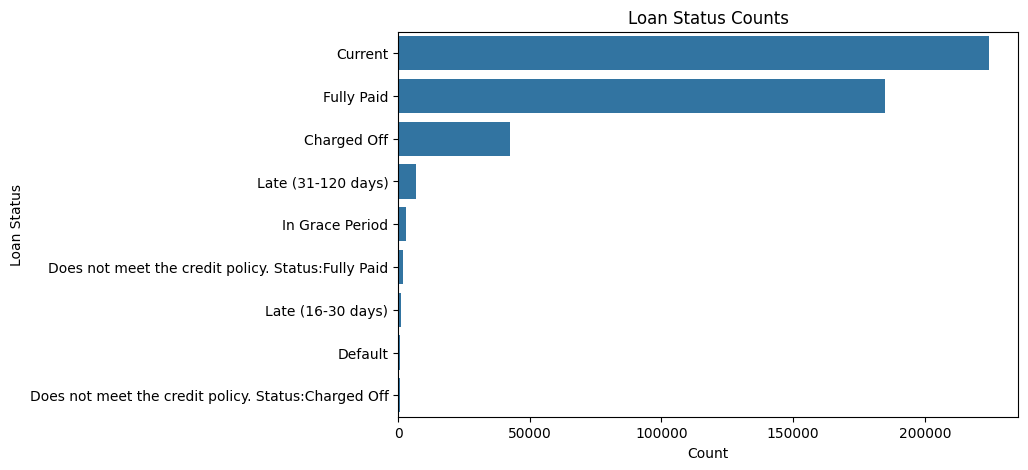

In [22]:
# Count of loan status
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, y='loan_status', order=df_cleaned['loan_status'].value_counts().index)
plt.title("Loan Status Counts")
plt.xlabel("Count")
plt.ylabel("Loan Status")
plt.show()


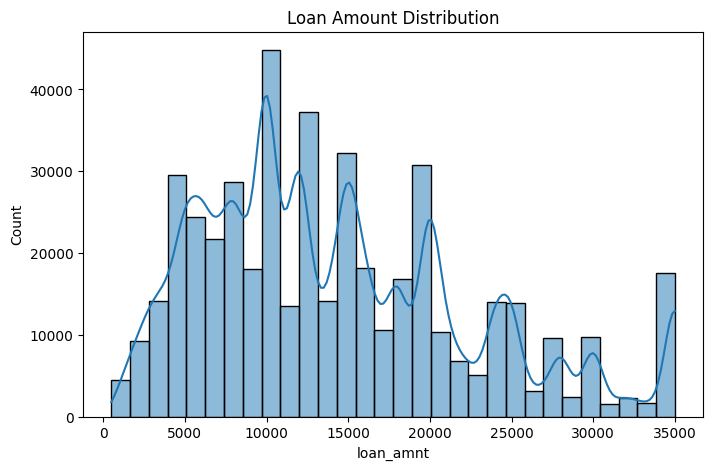

In [23]:
# Distribution of the loan amount
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['loan_amnt'], bins=30, kde=True)
plt.title("Loan Amount Distribution")
plt.show()

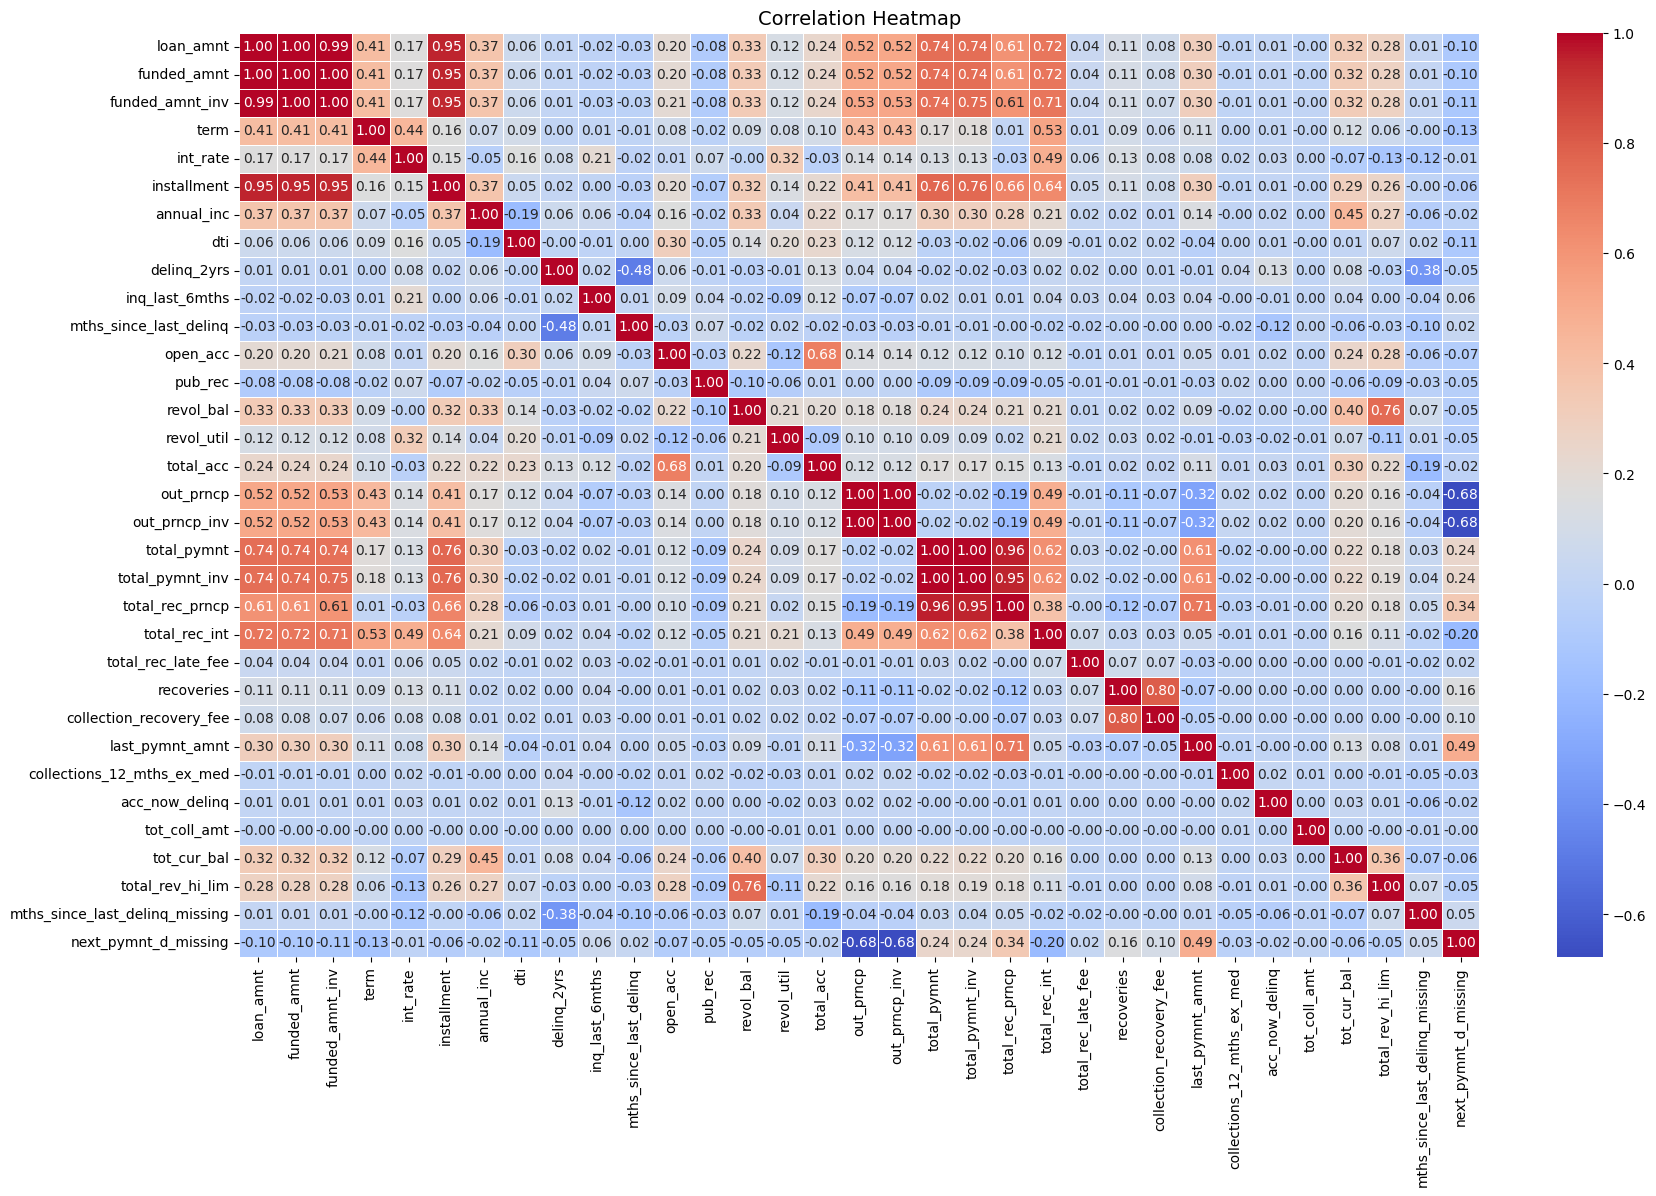

In [24]:
# Correlation matrix
df_numeric = df_cleaned.select_dtypes(include=['number'])  # Keep only numeric columns
correlation_matrix = df_numeric.corr()  # Compute correlation

# Plot the heatmap
plt.figure(figsize=(20, 12))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Heatmap", fontsize=14)

# Show the plot
plt.show()

In [25]:
# Select categorical columns (excluding 'member_id')
cat_columns = df_cleaned.select_dtypes(include=['object']).columns.drop('member_id')

# Loop through each categorical column and print unique values
for col in cat_columns:
    unique_values = df_cleaned[col].unique()
    print(f"Column: {col}")
    print(f"Number of unique values: {len(unique_values)}")
    print(f"Unique values: {unique_values[:10]}")  # Print first 10 unique values for preview
    print("-" * 50)


Column: grade
Number of unique values: 7
Unique values: ['B' 'C' 'A' 'E' 'F' 'D' 'G']
--------------------------------------------------
Column: sub_grade
Number of unique values: 35
Unique values: ['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1']
--------------------------------------------------
Column: emp_title
Number of unique values: 205475
Unique values: ['Teacher' 'Ryder' 'AIR RESOURCES BOARD' 'University Medical Group'
 'Veolia Transportaton' 'Southern Star Photography' 'MKC Accounting '
 'Starbucks' 'Southwest Rural metro' 'UCLA']
--------------------------------------------------
Column: emp_length
Number of unique values: 11
Unique values: ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years']
--------------------------------------------------
Column: home_ownership
Number of unique values: 6
Unique values: ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
--------------------------------------------------
Column: verificatio

### Feature Importance

In [26]:
# Rename categories on column of interest
status_mapping = {
    'Current': 'On Track',
    'Fully Paid': 'Fully Paid',
    'Late (31-120 days)': 'Arrears',
    'Late (16-30 days)': 'Arrears',
    'Charged Off': 'Loss',
    'In Grace Period': 'Grace Period',
    'Default': 'NPL'
}

# Apply the mapping
df_cleaned['loan_status'] = df_cleaned['loan_status'].map(status_mapping)

# Print unique values to confirm changes
print(df_cleaned['loan_status'].unique())


['Fully Paid' 'Loss' 'On Track' 'NPL' 'Arrears' 'Grace Period' nan]


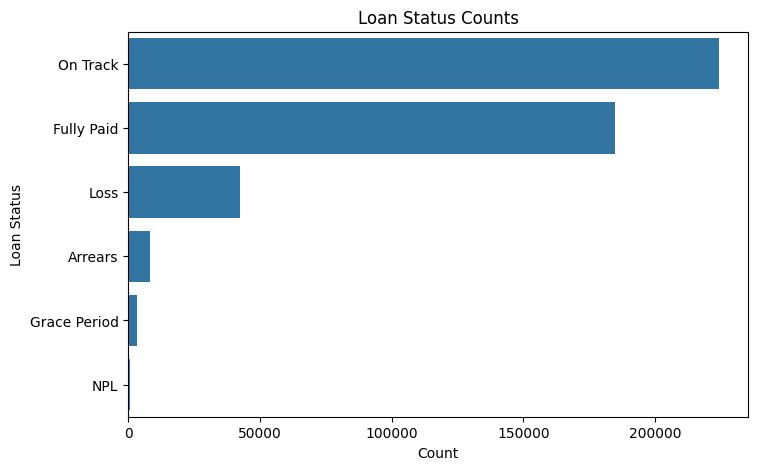

In [27]:
# Count of loan status
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, y='loan_status', order=df_cleaned['loan_status'].value_counts().index)
plt.title("Loan Status Counts")
plt.xlabel("Count")
plt.ylabel("Loan Status")
plt.show()

In [28]:
# Define binary classification for loan status
df_cleaned['loan_status_encoded'] = df_cleaned['loan_status'].apply(
    lambda x: 0 if x in ["Current", "Fully Paid"] else 1
)

# Display count of each category
print(df_cleaned['loan_status_encoded'].value_counts())


loan_status_encoded
1    281546
0    184739
Name: count, dtype: int64


In [29]:
# Encode pymnt_plan column to numerical values
df_cleaned['pymnt_plan_encoded'] = df_cleaned['pymnt_plan'].map({'n': 0, 'y': 1})

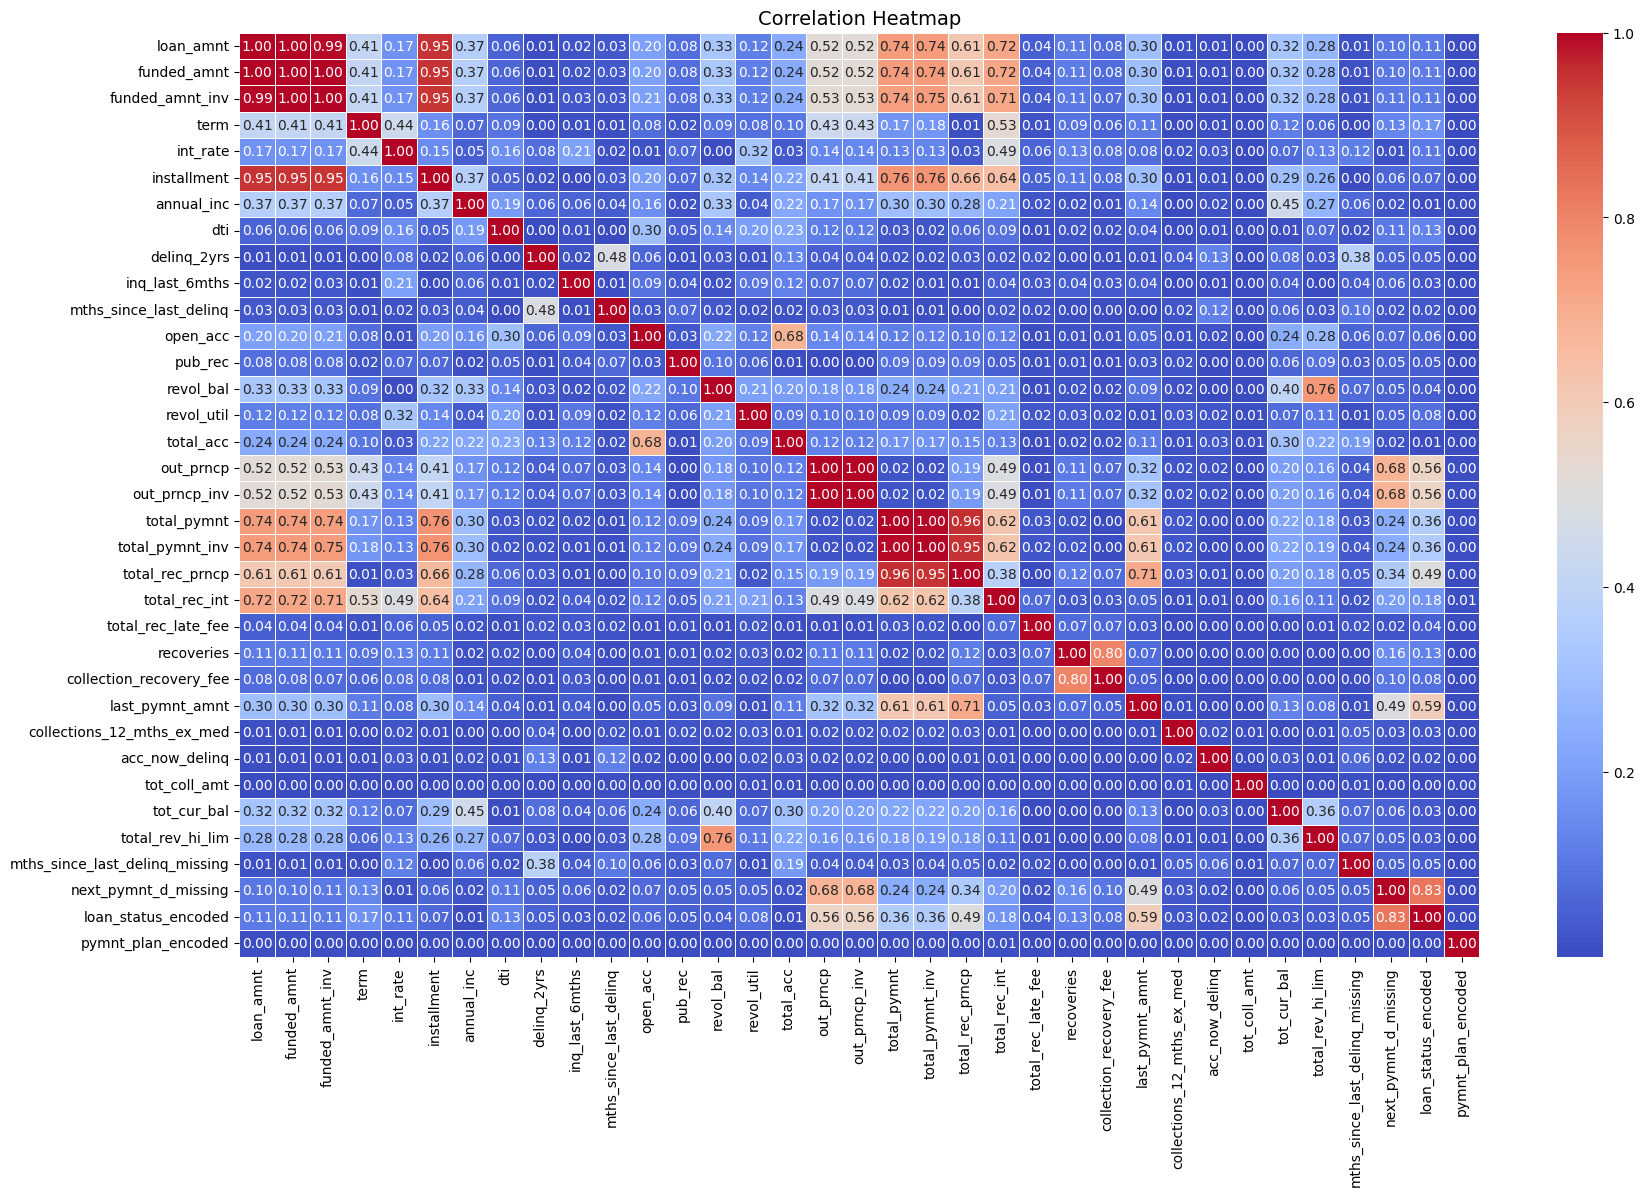

In [30]:
#Redo the correlation matrix
df_numeric = df_cleaned.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr().abs()

plt.figure(figsize=(20, 12))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap", fontsize=14)
# Show the plot
plt.show()

In [31]:
# Identify highly correlated pairs (threshold > 0.8)
high_corr_pairs = np.where(correlation_matrix > 0.8)
correlated_features = [
    (correlation_matrix.index[x], correlation_matrix.columns[y])
    for x, y in zip(*high_corr_pairs) if x != y and x < y
]

print("Highly correlated pairs:")
for pair in correlated_features:
    print(pair)

# Exclude the target column from being dropped
target_column = 'loan_status_encoded'

# Identify columns to drop (excluding the target)
columns_to_drop = set(y for x, y in correlated_features if y != target_column)

# Drop the highly correlated columns (excluding the target column)
df_cleaned.drop(columns=columns_to_drop, inplace=True)

print(f"Columns dropped due to high correlation: {columns_to_drop}")
print(df_cleaned.shape)

Highly correlated pairs:
('loan_amnt', 'funded_amnt')
('loan_amnt', 'funded_amnt_inv')
('loan_amnt', 'installment')
('funded_amnt', 'funded_amnt_inv')
('funded_amnt', 'installment')
('funded_amnt_inv', 'installment')
('out_prncp', 'out_prncp_inv')
('total_pymnt', 'total_pymnt_inv')
('total_pymnt', 'total_rec_prncp')
('total_pymnt_inv', 'total_rec_prncp')
('recoveries', 'collection_recovery_fee')
('next_pymnt_d_missing', 'loan_status_encoded')
Columns dropped due to high correlation: {'installment', 'funded_amnt_inv', 'total_rec_prncp', 'funded_amnt', 'collection_recovery_fee', 'total_pymnt_inv', 'out_prncp_inv'}
(466285, 47)


In [32]:
# Select numeric columns
numerical_cols = df_cleaned.select_dtypes(include=['number']).columns.tolist()
numerical_cols.remove('loan_status_encoded')  # Remove target column

# Define X (features) and y (target)
X = df_cleaned[numerical_cols]
y = df_cleaned['loan_status_encoded']

In [33]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
rf_importances = rf_model.feature_importances_

# Create DataFrame
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display top 10 features
print(importance_df.head(10))

                 Feature  Importance
25  next_pymnt_d_missing    0.275754
13             out_prncp    0.238631
18       last_pymnt_amnt    0.226104
14           total_pymnt    0.078769
17            recoveries    0.074633
0              loan_amnt    0.032580
15         total_rec_int    0.017201
1                   term    0.011403
23      total_rev_hi_lim    0.009817
22           tot_cur_bal    0.008402


In [34]:
# Save csv file for Power⁷BI
df_cleaned.to_csv("cleaned_lending_data.csv", index=False)

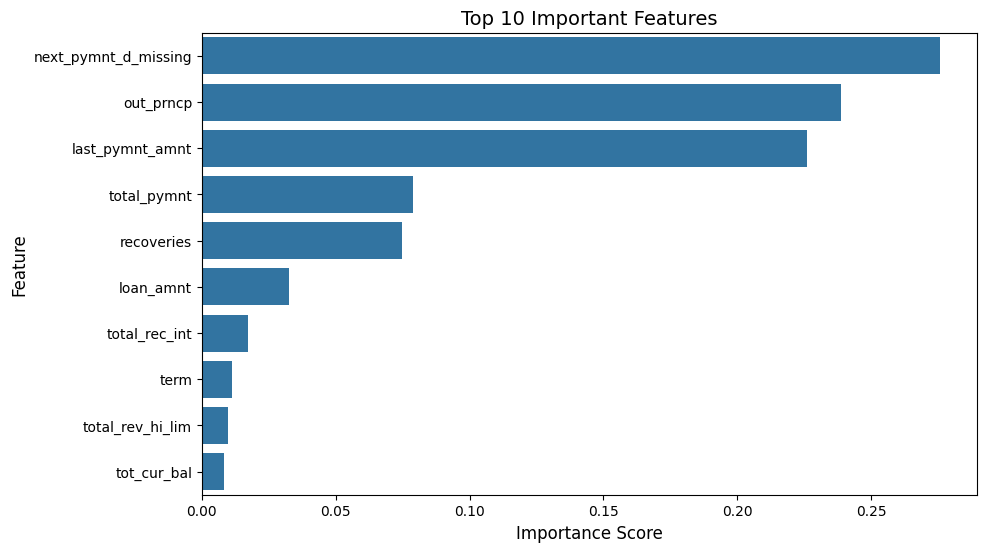

In [35]:
# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x="Importance", y="Feature")

# Titles and labels
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title("Top 10 Important Features", fontsize=14)

# Show the plot
plt.show()